# Asymptotic Dictionary Search Time Study

This notebook compares the time complexity of the search operation for a dictionary data structure using several different data structures as underlying implementations of the dictionary. The underlying implementations include:

 - Sorted and unsorted singly-linked lists
 - Sorted and unsorted doubly-linked lists
 - Sorted and unsorted arrays
 - Binary search trees
 - Hash tables
 
The comparison will be performed by randomly populating each data structure with a uniformly distributed sample of data ranging in size from $N=10 ... 10^{4}$. Search times will be compared by searching for data from the sample in each data structure and comparing the average search times for each value of $N$. 

Additionally, implementations of arrays, binary search trees, and hash tables in `C++` and `python` will be compared to assess the relative speeds of the `C++` and `python` runtime environments.
 


## Study 1: Search Time Complexity under Different Dictionary Implementations

### Simulation Code

In [1]:
from simulator import *
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 20

f = IntProgress(min=0, max=max_count) 
display(f) 

data_max = 10.0**4

N_array = np.logspace(1, 4,max_count)

avg_search_times = np.zeros((8,N_array.shape[0]))

n_samples = 40

avg_search_times  = Simulator.SimulateUniformData(N_array, 0,n_samples, data_max,avg_search_times,f)

IntProgress(value=0, max=20)

### Results

<Figure size 2000x1600 with 0 Axes>

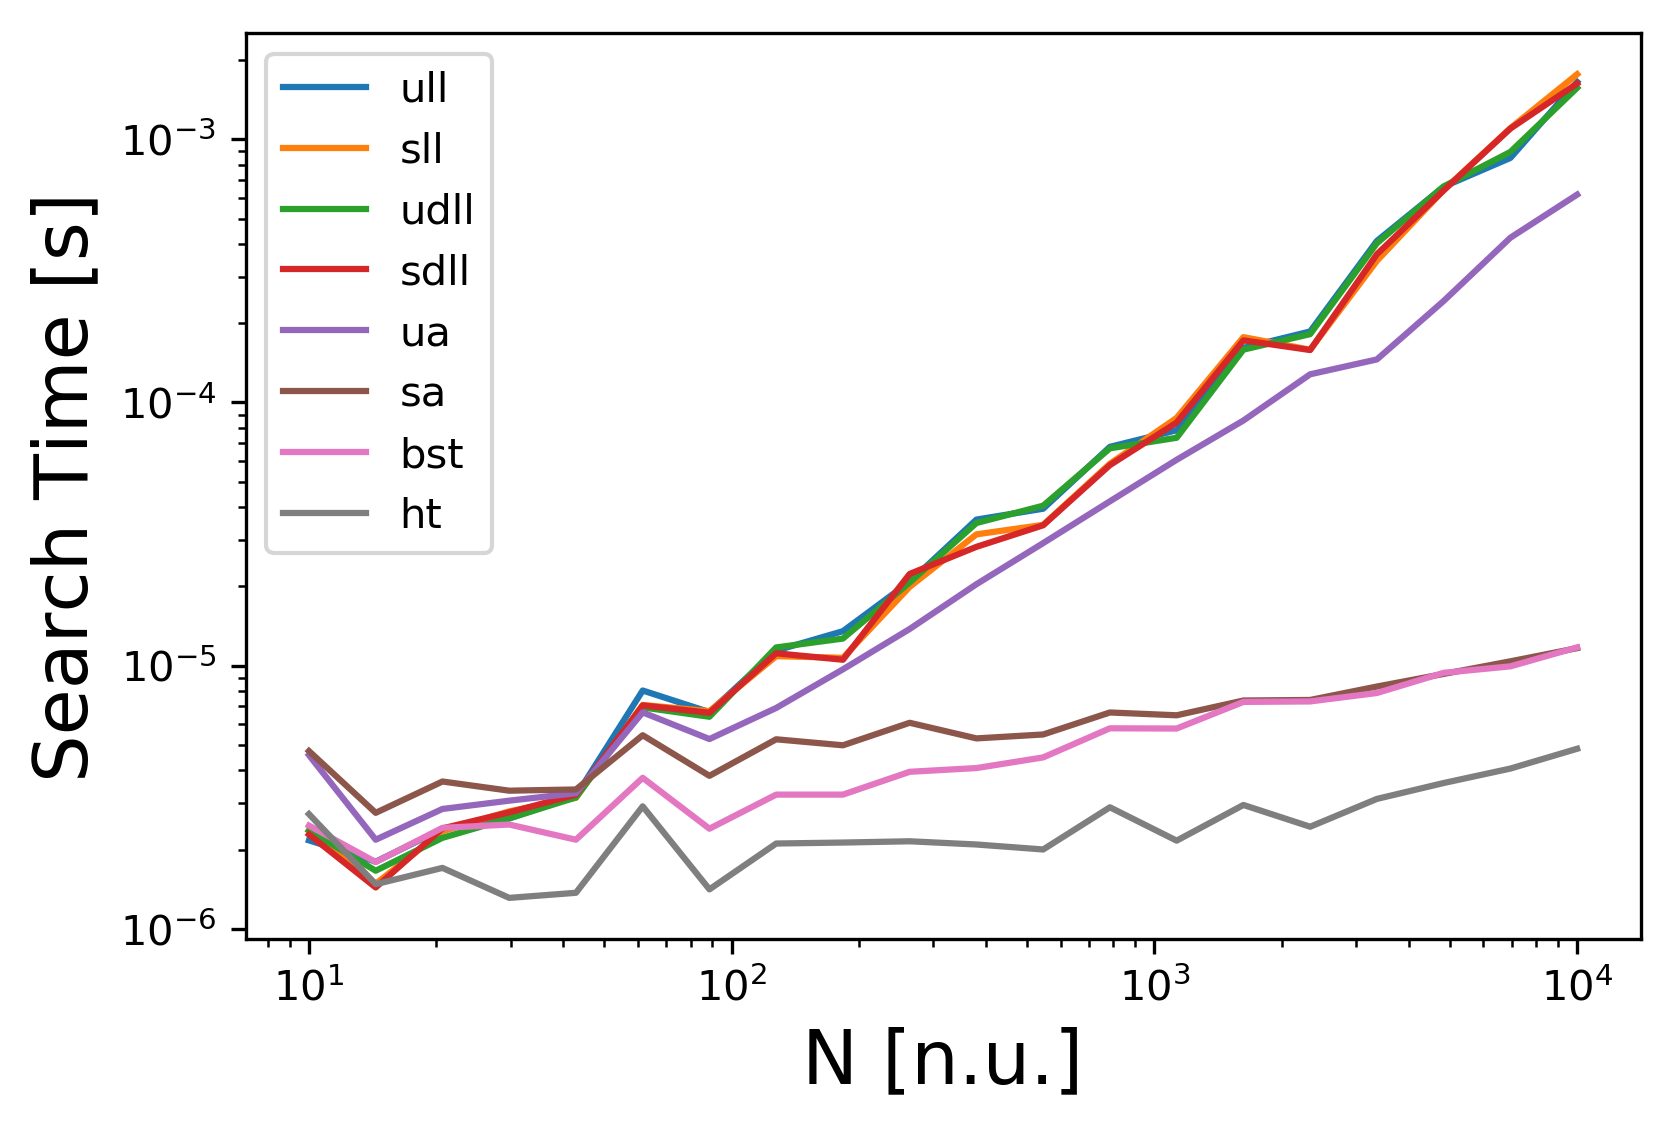

<Figure size 2000x1600 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

plt.loglog(N_array,avg_search_times[:][0] , label ='ull', linestyle='-')
plt.loglog(N_array,avg_search_times[:][1] , label ='sll', linestyle='-')
plt.loglog(N_array,avg_search_times[:][2] , label ='udll', linestyle='-')
plt.loglog(N_array,avg_search_times[:][3] , label ='sdll', linestyle='-')
plt.loglog(N_array,avg_search_times[:][4] , label ='ua', linestyle='-')
plt.loglog(N_array,avg_search_times[:][5] , label ='sa', linestyle='-')
plt.loglog(N_array,avg_search_times[:][6] , label ='bst', linestyle='-')
plt.loglog(N_array,avg_search_times[:][7] , label ='ht', linestyle='-')
    
plt.legend(loc='upper left')
plt.xlabel("N [n.u.]", fontsize=18)
plt.ylabel("Search Time [s]", fontsize=18)
plt.figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')
    

__Result Key:__

 - __sll__: sorted linked list
 - __ull__: unsorted linked list
 - __sdll__: sorted doubly linked list
 - __udll__: unsorted doubly linked list
 - __ua__: unsorted array
 - __sa__: sorted array
 - __bst__: binary search tree
 - __ht__: hash table
 
__Note__: Displayed results performed on a 2.8 GHz machine with 16 GB of memory.

### Analysis
The above results show that the hash table implementation has the lowest search time complexity of the dictionary implementations, with a $O(n/m)$ average complexity, where $m$ is the hash table size. Underlying data structures that allow binary search (e.g. the sorted array and binary search tree) give a $O(log(n))$ complexity. This beats the remaining implementations, which invariably require a linear search and therefore exhibit $O(n)$ time complexity for the search operation. 

The results are tabulated below, which reproduces the search times listed in [1]. 


|Data Structure|  Time Complexity for Dictionary Search|
|---|---|
|Unsorted Array|             $O(n)$               |
|Sorted   Array|             $O(log(n))$          |
|Unsorted LL   |             $O(n)$               |
|Sorted   LL   |             $O(n)$               |
|Unsorted DLL  |             $O(n)$               |
|Sorted   DLL  |             $O(n)$               |
|Binary Search Tree|         $O(log(n))$          |
|Hash Table*    |             $O(n/m)$             |


*$m$ is the initialized size of the hash table. Time complexity is the expected search time using chaining with doubly linked lists to resolve collisions. 



## Study 2: Dictionary Search Times  - Python and C++ Implementations

### Simulation Code

In [8]:
max_count = 7

f = IntProgress(min=0, max=max_count) 
display(f) 

data_max = 10.0**4
N_array = np.logspace(1, 5,max_count)

comp_avg_search_times = np.zeros((8,N_array.shape[0]))

n_samples = 40

comp_avg_search_times  = Simulator.SimulateUniformData(N_array, 0,n_samples, data_max,comp_avg_search_times,f, True)

IntProgress(value=0, max=7)

<Figure size 2000x1600 with 0 Axes>

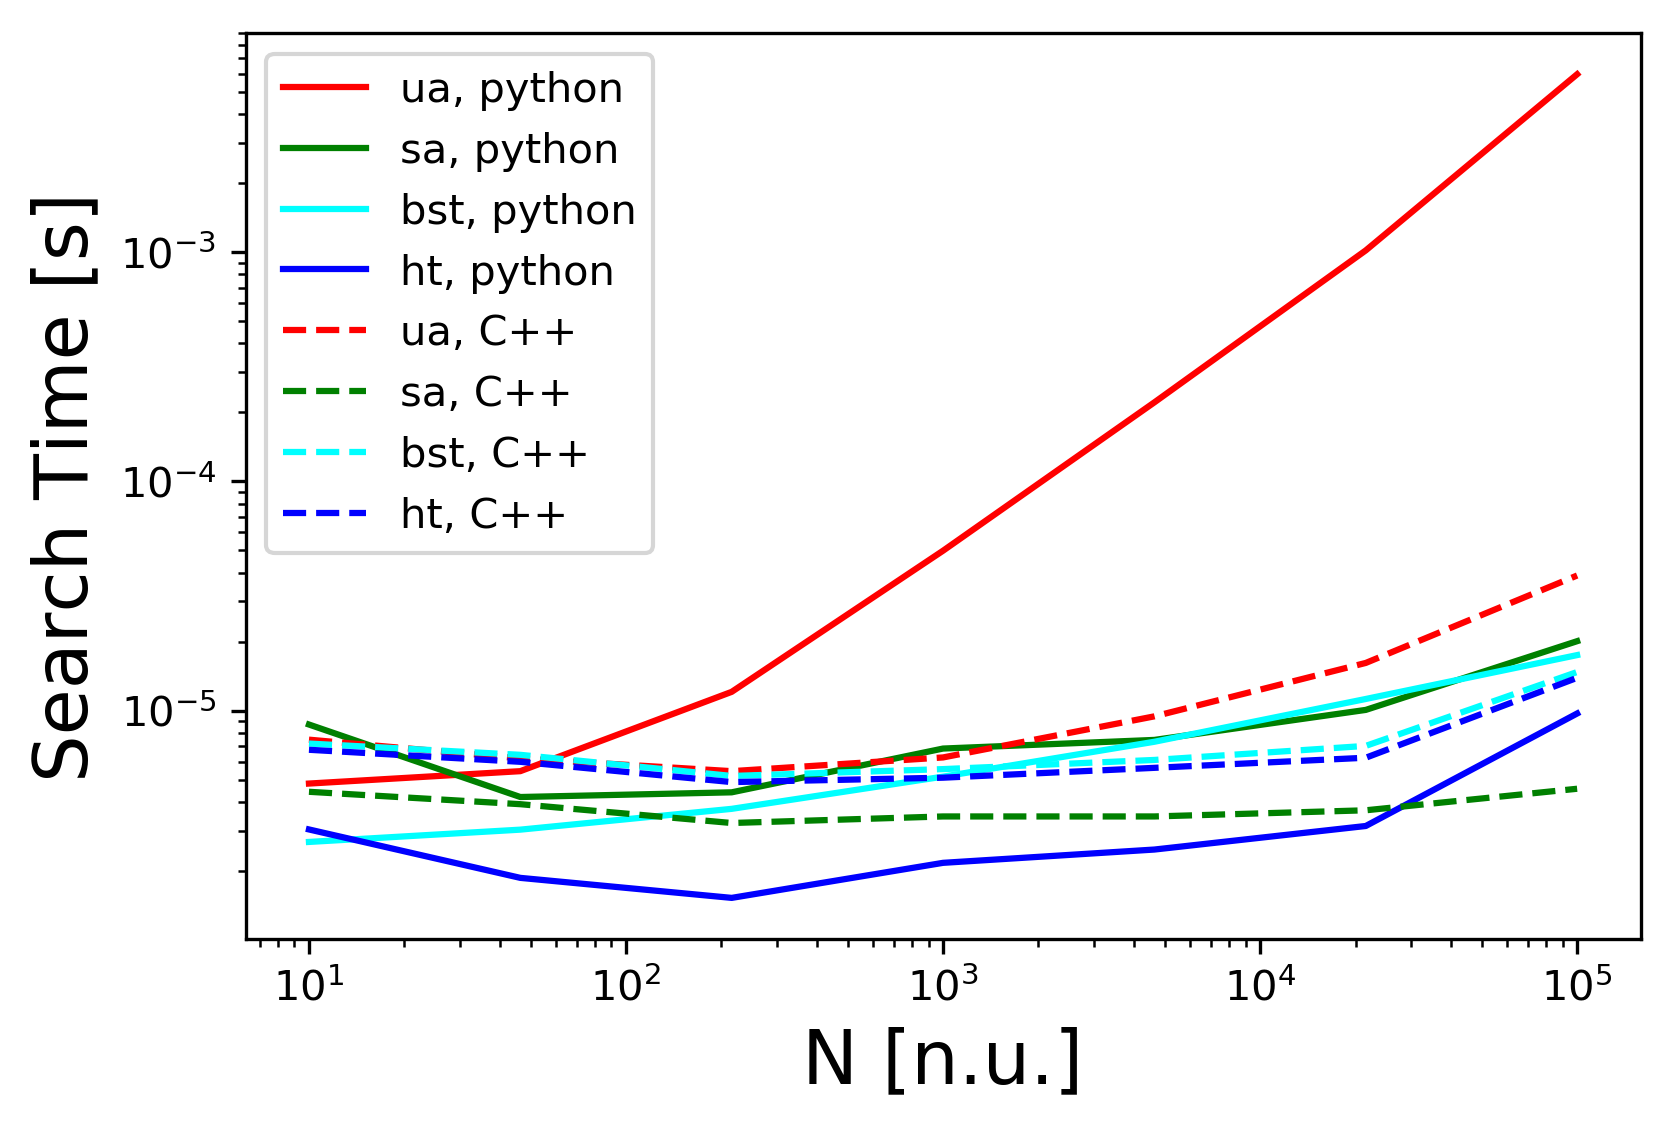

<Figure size 2000x1600 with 0 Axes>

In [9]:
mpl.rcParams['figure.dpi']= 300

plt.loglog(N_array,comp_avg_search_times[:][0] , label ='ua, python', linestyle='-', color='red')
plt.loglog(N_array,comp_avg_search_times[:][1] , label ='sa, python', linestyle='-', color='green')
plt.loglog(N_array,comp_avg_search_times[:][2] , label ='bst, python', linestyle='-', color='cyan')
plt.loglog(N_array,comp_avg_search_times[:][3] , label ='ht, python', linestyle='-', color='blue')
plt.loglog(N_array,comp_avg_search_times[:][4] , label ='ua, C++', linestyle='--',color='red')
plt.loglog(N_array,comp_avg_search_times[:][5] , label ='sa, C++', linestyle='--', color='green')
plt.loglog(N_array,comp_avg_search_times[:][6] , label ='bst, C++', linestyle='--', color='cyan')
plt.loglog(N_array,comp_avg_search_times[:][7] , label ='ht, C++', linestyle='--', color='blue')
    
plt.legend(loc='upper left')
plt.xlabel("N [n.u.]", fontsize=18)
plt.ylabel("Search Time [s]", fontsize=18)
plt.figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')

### Analysis
The above results show that, as expected, the `C++` implementations have generally faster runtimes that the  `python` implementations for the search operation. Importantly, there is a close to 1000x speedup for the C++ unsorted array versus the python unsorted array for the search operation. Curiously, the C++ hash table is slower than the python hash table. This discrepancy may be due to the overhead incurred by the `pyBind` library, which is used to invoke the C++ executables from python. 

### References

[1] S. Skiena, _The Algorithm Design Manual_, London: Springer-Verlag, 2011, pp. 74-75, 90